[paper](https://www.researchgate.net/publication/224839719_An_Analysis_of_Transformations_with_Discussion)

[StackExchange: llf of Box-Cox transform](https://stats.stackexchange.com/questions/261380/how-do-i-get-the-box-cox-log-likelihood-using-the-jacobian)

[Box-Cox Transformations: An Overview](https://www.ime.usp.br/~abe/lista/pdfm9cJKUmFZp.pdf)

[scipy code](https://github.com/scipy/scipy/blob/master/scipy/stats/morestats.py#L819)

[scipy API ref](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html#scipy.stats.boxcox)

[Concept: Korean](https://freshrimpsushi.github.io/posts/box-cox-transformation/)

In [1]:
# from sklearnex import patch_sklearn
# patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from scipy.stats import boxcox, boxcox_llf, boxcox_normmax, f_oneway, shapiro, probplot, pearsonr
from scipy.optimize import brent
from scipy.special import ndtri

# Load data

In [4]:
data = load_boston()

In [5]:
X = data['data']
y = data['target']

In [6]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

# EDA

In [7]:
corr = []
for col in range(X.shape[1]):
    corr.append(pearsonr(y, X[:,col])[0])
    print(str(col).zfill(2), np.unique(X[:,col]).size, corr[-1])

00 504 -0.3883046085868116
01 26 0.36044534245054327
02 76 -0.48372516002837296
03 2 0.17526017719029846
04 81 -0.4273207723732826
05 446 0.6953599470715395
06 356 -0.37695456500459623
07 412 0.24992873408590394
08 9 -0.3816262306397781
09 66 -0.4685359335677671
10 46 -0.507786685537562
11 357 0.3334608196570665
12 455 -0.737662726174015


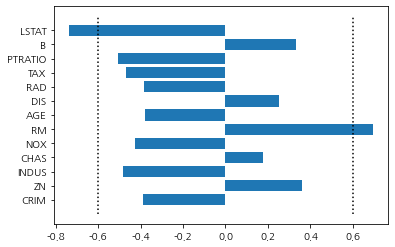

In [8]:
plt.barh(data['feature_names'], corr,)
plt.vlines(-.6, -1,13, linestyle=':', color='k')
plt.vlines(.6, -1,13, linestyle=':', color='k')
plt.show()

In [9]:
feat_num = -1
array = X[:,feat_num].copy()

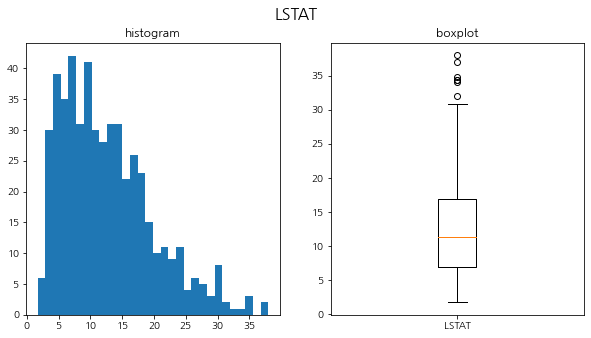

In [10]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax1.hist(array, bins=30)
ax1.set_title('histogram')
ax2 = fig.add_subplot(122)
ax2.boxplot(array, )
ax2.set_xticklabels([data['feature_names'][feat_num]])
ax2.set_title('boxplot')
fig.suptitle(data['feature_names'][feat_num], fontsize=16)
plt.show()

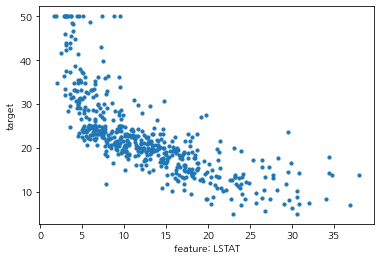

In [11]:
plt.scatter(array, y, s = 10)
plt.xlabel('feature: {}'.format(data['feature_names'][feat_num]))
plt.ylabel('target')
plt.show()

# Box-Cox

## Log likelihood function

In [12]:
df = pd.read_csv('UKgas.csv', index_col=0)

In [13]:
array = df['value'].values

* Approximately

$\large \displaystyle \begin{align*} l(\lambda) &= (\lambda - 1)\sum_{i}^{n} \log(x_i) - \frac{n}{2} \log(\mathrm{Var}(\mathbf{y})) \\
&= (\lambda - 1)\sum_{i}^{n} \log(x_i) - \frac{n}{2} \log(\frac{1}{n} \sum_{i}^{n}(y_i - \bar{y})^2) 
\end{align*}$ 

where $\large  \mathbf{y} = \begin{cases} \frac{\mathbf{x}^{\lambda} -1 }{\lambda}, &\lambda \ne 0\\ \log(\mathbf{x}), &\lambda = 0 \end{cases}$

In [66]:
lmbdas = np.linspace(-1,1, 100000)
llf = np.array([boxcox_llf(l, array) for l in lmbdas])

In [15]:
def _eval_mle(lmb, data):
    # refer to https://github.com/scipy/scipy/blob/master/scipy/stats/morestats.py#L1221
    return -boxcox_llf(lmb, data)

mx, my, _, _ = brent(_eval_mle, args = (array,), full_output=True, brack = (-2,2))

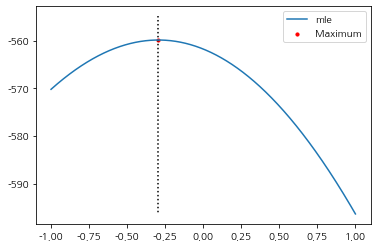

In [24]:
fig, ax = plt.subplots(1,1, )
ax.vlines(mx, -my +5, llf.min(), linestyle=':', color = 'k')
ax.plot(lmbdas, llf, label= 'mle')
ax.scatter(mx, -my, s=10, color='r', label = 'Maximum')
plt.legend()
plt.show()

In [62]:
chi2.ppf(0.95, 1)

3.841458820694124

In [63]:
li = []
max_val  =boxcox_llf(mx, array)
chi2_val = chi2.ppf(0.95, 1)  / 2
for l in lmbdas:
    if max_val - boxcox_llf(l, array) < chi2_val:
        li.append(l)

In [70]:
lmbdas[np.where(llf>max_val - chi2_val)[0]][0], lmbdas[np.where(llf>max_val - chi2_val)[0]][-1]

(-0.5940159401594016, 0.0016700167001670874)

In [65]:
boxcox(array, alpha=0.05)[2]

(-0.5940289682907943, 0.0016899087489284088)

In [53]:
max_val - chi2_val

-559.9352485894941

In [54]:
max_val

-559.807977902437

In [52]:
chi2_val

0.1272706870571565

In [50]:
chi2.pdf(0.95, 1)  / 2

0.1272706870571565

In [49]:
mx

-0.29438615381988975

In [44]:
max_val

-559.807977902437

In [38]:
np.diff(lmbdas)[:2]

array([0.00020002, 0.00020002])

In [64]:
print(min(li), max(li))

-0.5939593959395939 0.001500150015001589


In [60]:
boxcox_llf(0.09433863040910612, array)

-563.1254262029477

In [27]:
from scipy.stats import chi2

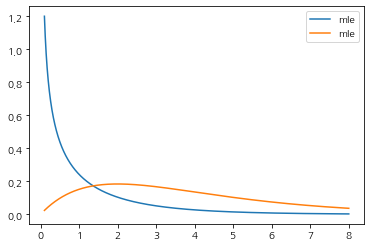

In [21]:
xx = np.linspace(.1, 8, 10000)

fig, ax = plt.subplots(1,1, )
#ax.vlines(mx, -my +5, llf.min(), linestyle=':', color = 'k')
#ax.plot(xx, chi2.pdf(xx, 1.), label= 'mle')
ax.plot(xx, chi2.pdf(xx, 1.), label= 'mle')
ax.plot(xx, chi2.pdf(xx, 4.), label= 'mle')
#ax.scatter(mx, -my, s=10, color='r', label = 'Maximum')
plt.legend()
plt.show()

In [17]:
boxcox(array,alpha=0.05)

(array([2.63457359, 2.5858214 , 2.47774214, 2.56725074, 2.63457359,
        2.57676706, 2.47774214, 2.56062862, 2.64753087, 2.60535869,
        2.49281743, 2.57364832, 2.66898675, 2.61057435, 2.50209875,
        2.56725074, 2.65565324, 2.6156422 , 2.49281743, 2.57364832,
        2.66714603, 2.62771163, 2.51947711, 2.58874361, 2.6830154 ,
        2.63680197, 2.52763157, 2.5972408 , 2.6879798 , 2.65565324,
        2.55024266, 2.60535869, 2.70930442, 2.67789441, 2.55722892,
        2.60798547, 2.72423611, 2.69747139, 2.56396861, 2.62536304,
        2.72423611, 2.69899988, 2.67080723, 2.60798547, 2.763865  ,
        2.67961934, 2.5972408 , 2.74134601, 2.77344347, 2.71212844,
        2.62298259, 2.78414336, 2.80184439, 2.72030492, 2.63231619,
        2.79408018, 2.83450317, 2.75466306, 2.65957249, 2.81614778,
        2.84895592, 2.77619566, 2.65762428, 2.81883265, 2.87864828,
        2.78066654, 2.65565324, 2.84630237, 2.87615603, 2.81271311,
        2.66898675, 2.8468376 , 2.89654409, 2.82

In [57]:
mx

-0.29438615381988975

In [54]:
boxcox(array,)[0].std()

0.13029464891072634

In [58]:
1.96 * boxcox(array,)[0].std()/np.sqrt(array.size)

0.024573712536708037

In [56]:
mx + 1.96 * boxcox(array,)[0].std()/np.sqrt(array.size)

-0.2698124412831817

In [14]:
print(mx, my)

0.22776736893884023 936.0000020256239


* Finding the proper $\lambda$

In [15]:
lmbda_optimal = boxcox_normmax(array, method='all')
lmbda_optimal

array([0.23939438, 0.22776737])

```
lmbda_optimal[0]: by Pearson correlation coefficient
lmbda_optimal[1]: by mle
```

## Transformed data

In [16]:
array1, lmbda = boxcox(array)
print(lmbda)

0.22776736893884023


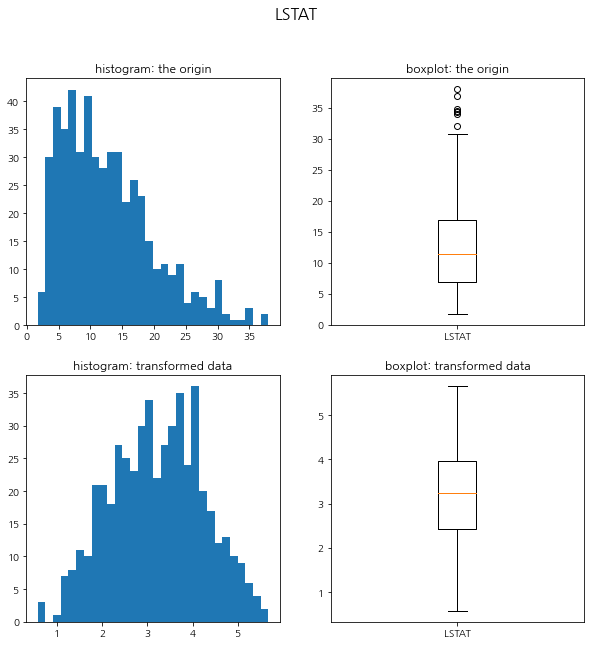

In [17]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax1.hist(array, bins=30)
ax1.set_title('histogram: the origin')
ax2 = fig.add_subplot(222)
ax2.boxplot(array, )
ax2.set_xticklabels([data['feature_names'][feat_num]])
ax2.set_title('boxplot: the origin')


ax3 = fig.add_subplot(223)
ax3.hist(array1, bins=30)
ax3.set_title('histogram: transformed data')
ax4 = fig.add_subplot(224)
ax4.boxplot(array1, )
ax4.set_xticklabels([data['feature_names'][feat_num]])
ax4.set_title('boxplot: transformed data')

fig.suptitle(data['feature_names'][feat_num], fontsize=16)
plt.show()

In [18]:
def filliben(n):
    result = np.zeros(n)
    result[-1] = 0.5**(1./n)
    result[0] = 1 - 0.5**(1./n)
    for i in range(2, n):
        result[i-1] = (i - 0.3175) / (n + 0.365)
    return result

In [22]:
array_sc = np.sort(StandardScaler().fit_transform(array.reshape(-1,1)).flatten())
array1_sc = np.sort(StandardScaler().fit_transform(array1.reshape(-1,1)).flatten())
norm_ppf = ndtri(filliben(array.size))

In [20]:
norm_ppf = (filliben(array.size))

In [36]:
val, sl = probplot(StandardScaler().fit_transform(array.reshape(-1,1)).flatten(), )

In [37]:
val1, sl1 = probplot(StandardScaler().fit_transform(array1.reshape(-1,1)).flatten(), )

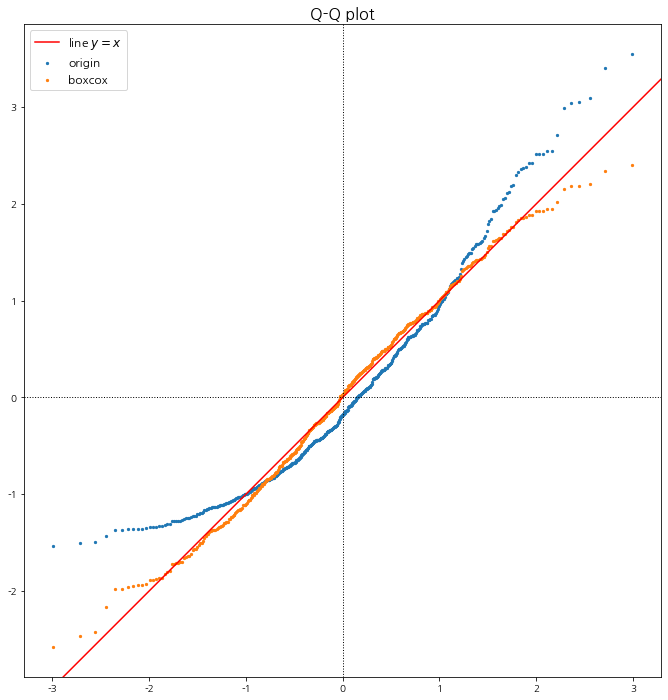

In [40]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.set_aspect(1)
ax.scatter(val[0], val[1], s=5, label='origin')
#ax.axline((0, sl[1]), slope=sl[0])
ax.scatter(val1[0], val1[1], s=5, label='boxcox')
#ax.axline((0, slope[1]), slope=slope[0], color = 'orange')
#ax.scatter(value[0], value[1], s=5, label='normal')
ax.axline((0,0), (1,1), color='r', label='line $y=x$')
ax.axline((0,0), (0,1), linestyle=':', linewidth=1, color='k')
ax.axline((0,0), (1,0), linestyle=':', linewidth=1, color='k')
plt.title('Q-Q plot', fontsize=16)
plt.legend(fontsize=12)
plt.show()

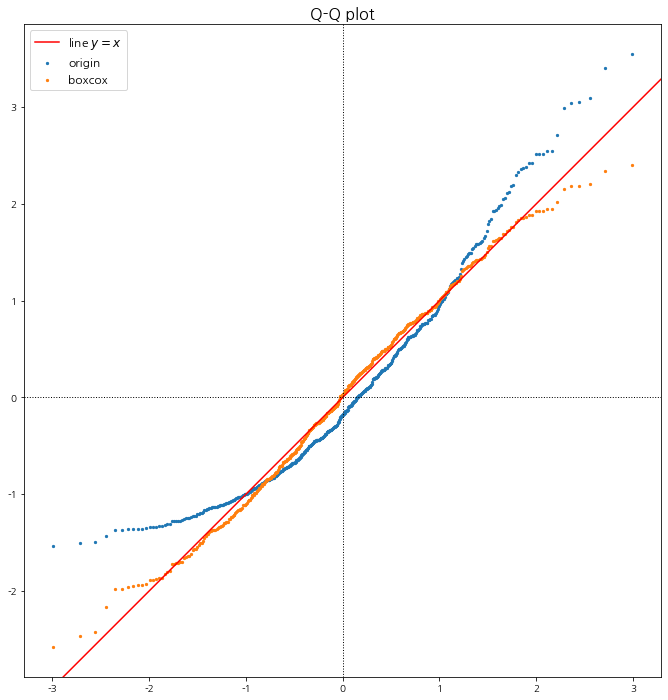

In [41]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.set_aspect(1)
ax.scatter(norm_ppf, array_sc, s=5, label='origin')
#ax.axline((0, sl[1]), slope=sl[0])
ax.scatter(norm_ppf, array1_sc, s=5, label='boxcox')
#ax.axline((0, slope[1]), slope=slope[0], color = 'orange')
#ax.scatter(value[0], value[1], s=5, label='normal')
ax.axline((0,0), (1,1), color='r', label='line $y=x$')
ax.axline((0,0), (0,1), linestyle=':', linewidth=1, color='k')
ax.axline((0,0), (1,0), linestyle=':', linewidth=1, color='k')
plt.title('Q-Q plot', fontsize=16)
plt.legend(fontsize=12)
plt.show()

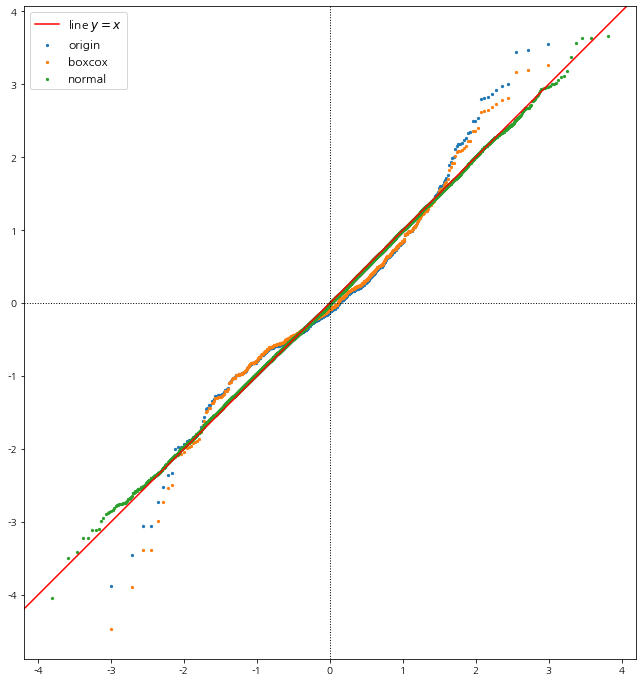

In [126]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.set_aspect(1)
ax.scatter(val[0], val[1], s=5, label='origin')
#ax.axline((0, sl[1]), slope=sl[0])
ax.scatter(values[0], values[1], s=5, label='boxcox')
#ax.axline((0, slope[1]), slope=slope[0], color = 'orange')
ax.scatter(value[0], value[1], s=5, label='normal')
ax.axline((0,0), (1,1), color='r', label='line $y=x$')
ax.axline((0,0), (0,1), linestyle=':', linewidth=1, color='k')
ax.axline((0,0), (1,0), linestyle=':', linewidth=1, color='k')
plt.legend(fontsize=12)
plt.show()

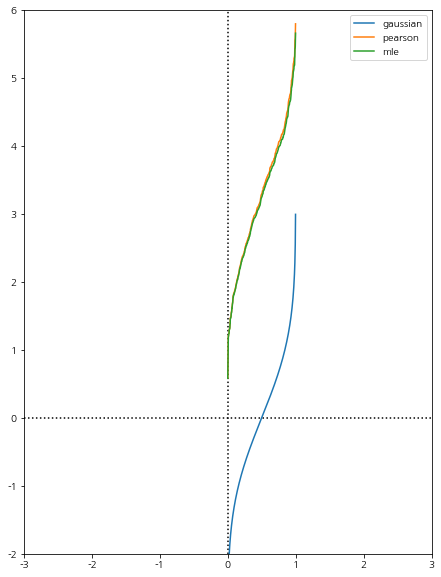

In [46]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.vlines(0., -2, 6, linestyle=':', color='k')
ax.hlines(0., -3, 3, linestyle=':', color='k')
ax.set_xlim(-3,3)
ax.set_ylim(-2,6)
ax.set_aspect(1)
#ax.plot(x,y,)
ax.plot(filliben(array.size), norm_ppf, label = 'gaussian')
ax.plot(filliben(array.size), np.sort(boxcox(array, lmbda = boxcox_normmax(array, method='all')[0])),  label='pearson' )
ax.plot(filliben(array.size), np.sort(boxcox(array, lmbda = boxcox_normmax(array, method='all')[1])),  label='mle' )
ax.legend()
plt.show()